#**PRE-PROCESSING**

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
from google.colab import drive
drive.mount('/content/drive')
movies = pd.read_csv('/content/drive/MyDrive/archive (1)/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/archive (1)/ratings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
print('shape of movies data:',movies.shape)
movies.head()

shape of movies data: (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
print('shape of rating data:',ratings.shape)
ratings.head()

shape of rating data: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [55]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


###Merging the two datasets

In [56]:
df = pd.merge(ratings,movies,on='movieId')
df = df.drop(['timestamp'],axis=1)
print('shape of df:',df.shape)
df

shape of df: (100836, 5)


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [57]:
df.describe().astype(int)

,userId,movieId,rating
count,100836,100836,100836
mean,326,19435,3
std,182,35530,1
min,1,1,0
25%,177,1199,3
50%,325,2991,3
75%,477,8122,4
max,610,193609,5


In [58]:
num_col=df.select_dtypes(include=['int64', 'float64'])
cat_col=df.select_dtypes(include=['object'])

###Checking for duplicates

In [59]:
def check_duplicate(df):
    duplicate_count = df.duplicated().sum()
    if duplicate_count == 0:
        return 'Data is clean, No Duplicate Data Found.'
    else:
        return f'{duplicate_count} Duplicate Rows Found.'

result = check_duplicate(df)
print(result)

Data is clean, No Duplicate Data Found.


###Checking for missing values

In [60]:
print('null values in the dataset:')
df.isnull().sum()

null values in the dataset:


userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

[Text(0.5, 1.0, 'distribution of rating variables')]

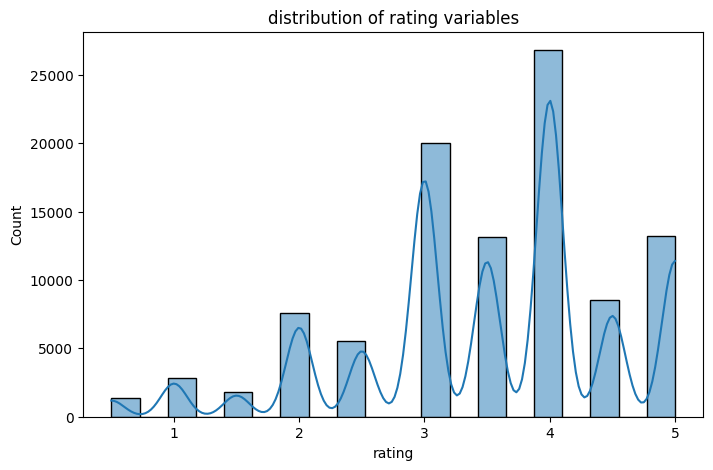

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(x=df['rating'],bins=20,kde=True).set(title='distribution of rating variables')

<Axes: ylabel='rating'>

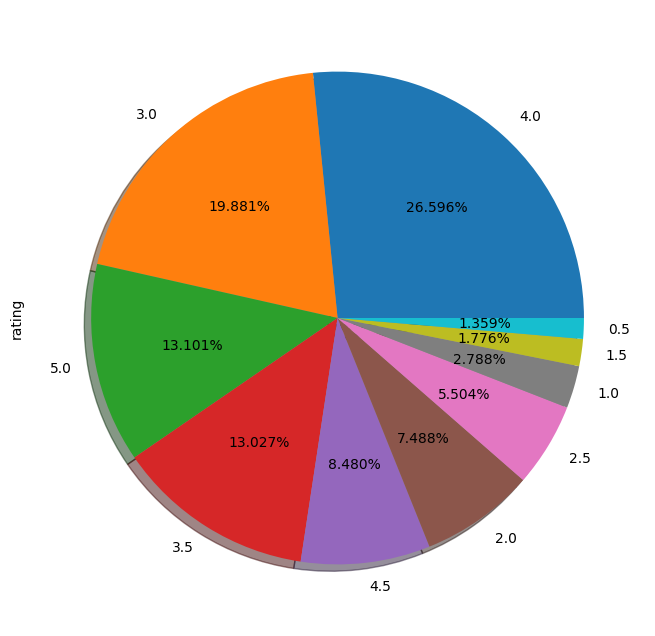

In [62]:
plt.figure(figsize=[8,8],clear=True)
df['rating'].value_counts().plot.pie(autopct='%1.3f%%',shadow=True)

In [63]:
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

###Correlation matrix

In [64]:
df.corr()

<ipython-input-64-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,userId,movieId,rating
userId,1.000000,0.006773,-0.049348
movieId,0.006773,1.000000,-0.004061
rating,-0.049348,-0.004061,1.000000


<ipython-input-65-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

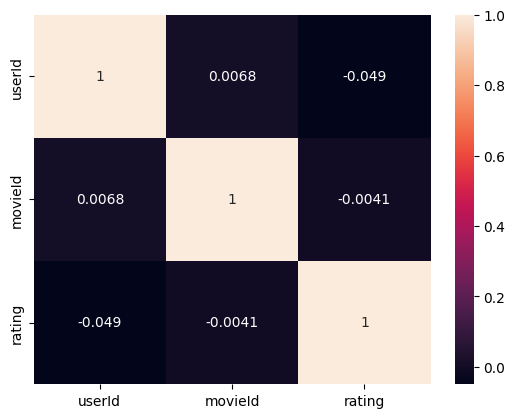

In [65]:
sns.heatmap(df.corr(),annot=True)

In [66]:
rating_count=df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'count'})
rating_count

,title,count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2
...,...,...
9714,eXistenZ (1999),22
9715,xXx (2002),24
9716,xXx: State of the Union (2005),5
9717,¡Three Amigos! (1986),26


In [67]:
final_df = pd.merge(df,rating_count,on='title',how='left')
final_df

,userId,movieId,rating,title,genres,count
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
...,...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller,1
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama,1
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller,1
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller,1


#**RECOMMENDATION SYSTEMS**

##**1. GENRE BASED MOVIE RECOMMENDATION SYSTEM**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
movies_path='/content/drive/MyDrive/archive (1)/movies.csv'
ratings_path='/content/drive/MyDrive/archive (1)/ratings.csv'

In [71]:
m=pd.read_csv(movies_path)
r=pd.read_csv(ratings_path)

In [72]:
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [74]:
m['genres']=m['genres'].str.replace('|', ' ')

<ipython-input-74-36014be5bfa5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  m['genres']=m['genres'].str.replace('|', ' ')


In [75]:
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
rec_data=pd.merge(m, r, on='movieId')

In [77]:
rec_data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,17,4.5,1305696483


In [78]:
def recommend(genre, n=10):
    genre_movies=rec_data[rec_data['genres'].str.contains(genre, case=False)]
    genre_movies=genre_movies.groupby(['movieId', 'title'])['rating'].mean().reset_index()
    top_genre_movies=genre_movies.sort_values(by='rating', ascending=False).head(n)
    return top_genre_movies[['title', 'rating']]
genre='Romance'
genre_recommendations=recommend(genre, 20)
print(genre_recommendations)

                                          title  rating
1005                     Mr. Skeffington (1944)     5.0
1491                     One I Love, The (2014)     5.0
1492                             Laggies (2014)     5.0
1514                            Delirium (2014)     5.0
1278                     Strictly Sexual (2008)     5.0
1012                  Thousand Clowns, A (1965)     5.0
1037      Summer's Tale, A (Conte d'été) (1996)     5.0
982                     Raise Your Voice (2004)     5.0
774   Open Hearts (Elsker dig for evigt) (2002)     5.0
491         All the Vermeers in New York (1990)     5.0
1560                        Unicorn City (2012)     5.0
497                           Bossa Nova (2000)     5.0
775                            Lady Jane (1986)     5.0
1559                          Spellbound (2011)     5.0
852                            Jane Eyre (1944)     5.0
1556                           The Girls (1961)     5.0
1566                           All Yours (2016) 

##**2. RATINGS BASED MOVIE RECOMMENDATION SYSTEM**

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [81]:
movie_info=pd.read_csv("/content/drive/MyDrive/archive (1)/movies.csv")
user_info=pd.read_csv("/content/drive/MyDrive/archive (1)/ratings.csv")

In [82]:
movie_info.shape

(9742, 3)

In [83]:
movie_info.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [84]:
user_info.shape

(100836, 4)

In [85]:
user_movie = pd.merge(user_info, movie_info, on='movieId')

In [86]:
user_movie.shape

(100836, 6)

In [87]:
user_movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


###User-movie rating matrix

In [88]:
movie_user_filtercoll = user_movie.pivot_table('rating', columns='movieId', index='userId')
movie_user_filtercoll = movie_user_filtercoll.fillna(0)

In [89]:
movie_user_filtercoll

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k, metric='cosine')
knn.fit(movie_user_filtercoll.values.T, movie_user_filtercoll.columns)

KNeighborsRegressor(metric='cosine')

###Selecting a user and finding the movies they have rated positively

In [91]:
user_id = 1
user_likes = movie_user_filtercoll.loc[user_id]
user_positive_ratings = user_likes[user_likes > 0]

In [92]:
user_positive_ratings

movieId
1       4.0
3       4.0
6       4.0
47      5.0
50      5.0
       ... 
3744    4.0
3793    5.0
3809    4.0
4006    4.0
5060    5.0
Name: 1, Length: 232, dtype: float64

In [93]:
recommendations_user_based = []

In [94]:
for movie_id, rating in user_positive_ratings.items():
    movie_index = movie_user_filtercoll.columns.get_loc(movie_id)
    distances, indices = knn.kneighbors([movie_user_filtercoll.iloc[:, movie_index]], n_neighbors=k)
    similar_movie_ids = movie_user_filtercoll.columns[indices[0]]
    similar_movie_ids = [movie for movie in similar_movie_ids if movie not in user_positive_ratings.index]
    recommendations_user_based.extend(similar_movie_ids)

In [95]:
print(recommendations_user_based[:5])
print(len(recommendations_user_based))

[3114, 762, 788, 32, 293]
398


In [96]:
recommendations_ = [movie_id for movie_id in set(recommendations_user_based) if movie_id not in user_positive_ratings.index]

In [97]:
recommended_movie_names = [user_movie[user_movie['movieId'] == movie_id]['title'].values[0] for movie_id in recommendations_]

In [98]:
len(recommendations_)

308

In [99]:
print(recommended_movie_names[0:5])
print(len(recommended_movie_names))

['Herbie Goes Bananas (1980)', 'Dracula: Dead and Loving It (1995)', 'Casino (1995)', 'Get Shorty (1995)', 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']
308


In [100]:
genres = movie_info['genres'].str.split('|', expand=True)

In [101]:
genres

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None,None,None,None,None
9738,Animation,Comedy,Fantasy,None,None,None,None,None,None,None
9739,Drama,None,None,None,None,None,None,None,None,None
9740,Action,Animation,None,None,None,None,None,None,None,None


In [102]:
movie_genre_matrix = pd.get_dummies(genres, prefix="", prefix_sep="").groupby(level=0, axis=1).max()

In [103]:
movie_genre_matrix

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
user_movie_ratings = user_info.merge(movie_genre_matrix, left_on="movieId", right_index=True)
user_movie_ratings

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
516,5,1,4.0,847434962,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
874,7,1,4.5,1106635946,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1434,15,1,2.5,1510577970,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1667,17,1,4.5,1305696483,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,610,6095,3.5,1479542444,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
100012,610,7202,3.0,1493848602,0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
100033,610,7562,2.5,1479544865,0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
100038,610,7984,4.0,1495959169,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
user_movie_ratings.drop(columns=['timestamp',"(no genres listed)","rating"],inplace=True)

In [106]:
user_genre_preferences = user_movie_ratings.groupby("userId").mean()

In [107]:
user_genre_preferences

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,1854.603448,0.159483,0.116379,0.043103,0.077586,0.280172,0.112069,0.025862,0.461207,0.056034,0.012931,0.129310,0.000000,0.034483,0.060345,0.172414,0.073276,0.211207,0.043103,0.008621
2,3600.833333,0.500000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.333333,0.000000,0.000000
3,2931.777778,0.194444,0.111111,0.055556,0.083333,0.222222,0.222222,0.027778,0.638889,0.000000,0.000000,0.083333,0.055556,0.000000,0.055556,0.138889,0.138889,0.222222,0.027778,0.000000
4,1982.129630,0.180556,0.097222,0.023148,0.055556,0.319444,0.120370,0.018519,0.509259,0.060185,0.013889,0.111111,0.000000,0.023148,0.064815,0.217593,0.087963,0.157407,0.041667,0.023148
5,343.840909,0.295455,0.136364,0.068182,0.113636,0.318182,0.045455,0.022727,0.386364,0.068182,0.000000,0.090909,0.000000,0.022727,0.022727,0.136364,0.136364,0.227273,0.000000,0.022727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3435.950000,0.204255,0.156383,0.054255,0.073404,0.352128,0.119149,0.035106,0.475532,0.080851,0.010638,0.094681,0.008511,0.037234,0.055319,0.158511,0.107447,0.204255,0.043617,0.019149
607,1860.636364,0.139037,0.128342,0.032086,0.085561,0.336898,0.064171,0.026738,0.475936,0.032086,0.010695,0.085561,0.000000,0.037433,0.053476,0.208556,0.069519,0.149733,0.064171,0.021390
608,3056.394737,0.175439,0.126566,0.047619,0.075188,0.335840,0.122807,0.028822,0.491228,0.078947,0.008772,0.105263,0.006266,0.045113,0.057644,0.157895,0.104010,0.196742,0.041353,0.016291


In [108]:
def recommend_movies(user_id, n=5):
  user_preferences = user_genre_preferences.loc[user_id]
  #Sort genres by user's preference in descending order
  recommended_genres = user_preferences.sort_values(ascending=False).index
  #Get top-rated movies for the user in each genre
  recommendationss = []
  for genre in recommended_genres:
    genre_movies = movie_info[movie_info['genres'].str.contains(genre)]
    genre_movies = genre_movies[~genre_movies["movieId"].isin(user_movie_ratings[user_movie_ratings["userId"] == user_id]["movieId"])]
    genre_movies.reset_index(drop=True, inplace=True)
    recommendationss.extend(genre_movies["title"].head(n).tolist())
  return recommendationss[:n]

In [109]:
user_id = 100
recommended_movies = recommend_movies(user_id, n=5)
print("Top 5 recommended movies for user", user_id, ":")
for i, movie in enumerate(recommended_movies):
    print(f"{i + 1}. {movie}")

Top 5 recommended movies for user 100 :
1. Waiting to Exhale (1995)
2. Nixon (1995)
3. Money Train (1995)
4. Copycat (1995)
5. Powder (1995)
